# Intro to Jupyter & Kickstarter data exploration 

XP:
- jupyter notebook nuggets
- pandas starter pack
- plot some pretty graphs

Main "inspiration" credits to: https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/ and King's awesome tech data scientist Juan González-Vallinas.

Kickstarter data: https://www.kaggle.com/socathie/kickstarter-project-statistics

Plotting "inspiration": https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations

If not installed, try it here: https://try.jupyter.org/

*Any follow-up questions/suggestions on improvements, feel free to contact me (Sam): contradirony@gmail.com*


------------------------
## 1. Jupyter notebook nuggets: how to use Jupyter - efficiently!

### First, what is Jupyter notebook? 
In a nutshell: it is an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media. That's more or less it. Simples.

#### Some keyboard shortcuts: change from code to markdown, new section, auto-completion

- Shift+Enter to execute a cell
- Cells have multiple modes, but main ones are Code and <a href="http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html">Markdown</a>
- Everything you want do do is in the toolbars above, but check the shortcuts cheatlist by pressing `h` outside of a cell and make your life easier

Easy reference:

**General**

Enter: enter edit mode

Shift-Enter: run cell, select below

Ctrl-Enter: run cell

Alt-Enter: run cell, insert below

**Command Mode (press Esc to enable)**

A/B: insert cell above/below

**Edit Mode (press Enter to enable)**

Tab: code completion or indent

Ctrl-Shift-Subtract: split cell

Ctrl-/: comment and uncomment


### Python basics
Python comes with [batteries included](https://www.pythonanywhere.com/batteries_included/). This means that plenty of functionality is included in the core language that other general programming languages usually offer through external modules. In this regard, R has a similar (but not identical philosophy), as it is not a general purpose programming language. Lets start with the builtin type `list`

In [1]:
boring_list = [1,2,3,4,5]
for item in boring_list:
    print(item)

1
2
3
4
5


This is already simpler than contructing something similar in a lower-level programming language like C as there you will need to declare the type and the size of the list a priori. Dictionaries and Lists have more high level functionality. 

For example, this snippet creates a list that mixes multiple types and operates with it

In [2]:
crazy_list = [list(), "discard me", 2, 3, {}, range(10), "abc", 12.3234] #You can add any kind of type
crazy_list.append("added after initialization") #Python lists are mutable
crazy_list.pop(1) #there are functions 
for i, item in enumerate(crazy_list):
    if type(item) is not range:
        print("'{}' is a {} and it is element number {}".format(item, type(item), i)) 

'[]' is a <class 'list'> and it is element number 0
'2' is a <class 'int'> and it is element number 1
'3' is a <class 'int'> and it is element number 2
'{}' is a <class 'dict'> and it is element number 3
'abc' is a <class 'str'> and it is element number 5
'12.3234' is a <class 'float'> and it is element number 6
'added after initialization' is a <class 'str'> and it is element number 7


In [3]:
crazy_list

[[], 2, 3, {}, range(0, 10), 'abc', 12.3234, 'added after initialization']

#### If you are new to python, the most relevant concept to understand here is [slicing](http://stackoverflow.com/questions/509211/explain-pythons-slice-notation#509295)

Understanding slicing in python is important because it is shared by many python objects, including `pandas` objects

In [4]:
crazy_list[0]

[]

In [5]:
crazy_list[2:5]

[3, {}, range(0, 10)]

In [6]:
crazy_list[-4:-1] # get the fifth last to the second last item

[range(0, 10), 'abc', 12.3234]

#### Dictionaries are flexible and batteries included too

`pandas.DataFrame` key-value system is inherited from python dictionaries

In [7]:
my_dict = {"a":dict(), 
           "b":6, 
           "foo":10, 
           "a_list_because_why_not": [1,2,3,34,4,5,5,456,45645]}

In [8]:
my_dict["b"]

6

In [9]:
my_dict.keys()

dict_keys(['a', 'foo', 'b', 'a_list_because_why_not'])

In [10]:
my_dict.values()

dict_values([{}, 10, 6, [1, 2, 3, 34, 4, 5, 5, 456, 45645]])

In [11]:
for key, value in my_dict.items():
    print(key, value)

a {}
foo 10
b 6
a_list_because_why_not [1, 2, 3, 34, 4, 5, 5, 456, 45645]


There is a lot more to lists, dicts and other basic data structures, check [here](https://docs.python.org/3/tutorial/datastructures.html) for a more complete tutorial. 

### Some miscellaneous possibilities
LaTeX for pretty equations

In [12]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

In [13]:
%%latex
$$F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx$$

<IPython.core.display.Latex object>

You can even embed webpages and youtube videos!

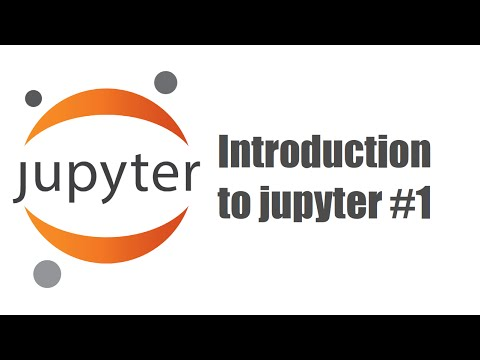

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('Rc4JQWowG5I')

In [15]:
%%HTML
'<iframe src=https://en.wikipedia.org/wiki/IPython#Project_Jupyter width=700 height=350></iframe>'

### Jupyter notebook specifics

In [16]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url="http://s2.quickmeme.com/img/36/36456ab87e8e451857a4cf69367b01e68036846903f016a1ff96c3f10bbfb126.jpg")

#### Magics

What is super handy is that you can start notebooks with different kernels (e.g., R, Julia) — not just Python. What's good to know is that within a notebook, **you can run different types of code in different cells**. With “magics”, it is possible to use different languages. The magics that are available vary per notebook kernel, depending on what you've installed.

By running % lsmagic in a cell you get a list of all the available magics. 

In [17]:
 % lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

You can use % to start a single-line expression to run with the magics command, or you can use a double %% to run a multi-line expression. I.e. with %% the kernel is within the scope of that cell, otherwise it's within the scope of that one line after %.

Note: Automagic is ON, % prefix IS NOT needed for line magics.

So, for example, while the following works as multi-line

**Example 1**

In [18]:
%%bash
ls
ls -l datasets

2016-12-03-SL-Intro_To_Jupyter_Part1_Intro.html
2016-12-03-SL-Intro_To_Jupyter_Part1_Intro.ipynb
2016-12-03-SL-Intro_To_Jupyter_Part2_Data_and_Graphs.ipynb
datasets
total 1792
-rw-rw-r-- 1 sammi sammi 1811629 Nov  9 23:19 most_backed_kickstarter.csv
-rw-rw-r-- 1 sammi sammi     424 Jan 12 19:02 pandas_tutorial.csv
-rw-rw-r-- 1 sammi sammi     364 Jan 12 19:02 pandas_tutorial.json


having only one % doesn't

In [19]:
%ls
ls -l datasets

SyntaxError: invalid syntax (<ipython-input-19-155d6a67827a>, line 2)

but if you follow the one % with a valid python statement, it does

In [20]:
# Mix of python and bash in one cell
print('does this work?')
%ls
print('yup')

does this work?
2016-12-03-SL-Intro_To_Jupyter_Part1_Intro.html
2016-12-03-SL-Intro_To_Jupyter_Part1_Intro.ipynb
2016-12-03-SL-Intro_To_Jupyter_Part2_Data_and_Graphs.ipynb
datasets/
yup


My personal favourite, R integration

In [21]:
%load_ext rpy2.ipython

In [22]:
%%R
X <- runif(10)
Y <- runif(10)

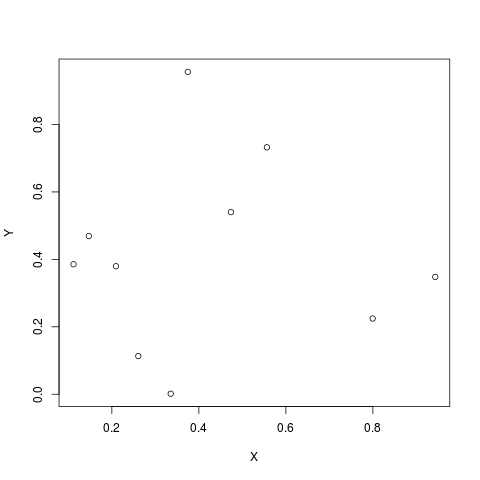

In [23]:
%R plot(X,Y)

You can even move vectors (dataframes) between R and python

In [24]:
%R X

array([ 0.37463105,  0.33526447,  0.26086388,  0.4737362 ,  0.55632062,
        0.20931249,  0.79945687,  0.94343006,  0.1470267 ,  0.11190327])

In [25]:
X

NameError: name 'X' is not defined

In [26]:
import pandas as pd
%R -o X
pydf = pd.DataFrame(X)
pydf

,0
0,0.374631
1,0.335264
2,0.260864
3,0.473736
4,0.556321
5,0.209312
6,0.799457
7,0.943430
8,0.147027
9,0.111903


Now you can

In [27]:
X

array([ 0.37463105,  0.33526447,  0.26086388,  0.4737362 ,  0.55632062,
        0.20931249,  0.79945687,  0.94343006,  0.1470267 ,  0.11190327])

In [28]:
pydf=[1,2,3]

In [29]:
%%R -i pydf
pydf

[1] 1 2 3


### Finally, the real reason for notebooks

In [30]:
Image(url="https://extraimage.net/images/2015/08/11/sharing-is-caring.jpg")

Convert notebook to other formats for easy sharing https://ipython.org/ipython-doc/3/notebook/nbconvert.html

In [ ]:
# Do not uncomment, run this on the command line
# jupyter nbconvert --to html 2016-12-03-SL-Intro_To_Jupyter_Part1_Intro.ipynb

---------------------------